# Consignes

projet : https://openclassrooms.com/fr/projects/630/assignment
données : https://www.kaggle.com/olistbr/brazilian-ecommerce

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

* La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
* Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
* Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Livrables

* Un notebook de l'analyse exploratoire (non cleané, pour comprendre votre démarche).
* Un notebook (ou code commenté au choix) d’essais des différentes approches de modélisation (non cleané, pour comprendre votre démarche).
* Un support de présentation pour la soutenance.


# Import et données 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

In [2]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
translation = pd.read_csv('data/product_category_name_translation.csv')

# Connaissance du jeu de données et Nettoyage

## Observation 

### Contenu 

In [3]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [4]:
geolocalisation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [5]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [11]:
translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [12]:
liste_df = [customers, 
            geolocalisation,
            order_items,
            order_payments,
            order_reviews,
            orders,products,
            sellers,
            translation]

In [13]:
noms_df = ['customers', 
           'geolocalisation',
           'order_items',
           'order_payments',
           'order_reviews',
           'orders',
           'products',
           'sellers',
           'translation']

### Dimensions des jeux de données

In [14]:
for df in liste_df :
    print(df.shape)

(99441, 5)
(1000163, 5)
(112650, 7)
(103886, 5)
(99224, 7)
(99441, 8)
(32951, 9)
(3095, 4)
(71, 2)


### Données manquantes

In [15]:
for df in liste_df:
    print(df.isna().sum().sum()/df.shape[0]/df.shape[1], 'NaN')

0.0 NaN
0.0 NaN
0.0 NaN
0.0 NaN
0.21006294560071873 NaN
0.00616948743476031 NaN
0.008254681193287003 NaN
0.0 NaN
0.0 NaN


On a des NaN uniquement des order_reviews, orders et products

In [16]:
order_reviews.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

pour order_reviews, les NaN correspondent à  des commentaires vides

In [17]:
orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Pour les commandes, les NaN sont croissants dans l'ordre d'un processus de commande et correspondent aux commandes qui posent problème

In [18]:
orders.max()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_16616/3084253277.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  orders.max()


order_id                         fffe41c64501cc87c801fd61db3f6244
customer_id                      ffffe8b65bbe3087b653a978c870db99
order_status                                          unavailable
order_purchase_timestamp                      2018-10-17 17:30:18
order_estimated_delivery_date                 2018-11-12 00:00:00
dtype: object

In [19]:
orders.order_approved_at

0        2017-10-02 11:07:15
1        2018-07-26 03:24:27
2        2018-08-08 08:55:23
3        2017-11-18 19:45:59
4        2018-02-13 22:20:29
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 13:10:37
99438    2017-08-27 15:04:16
99439    2018-01-08 21:36:21
99440    2018-03-09 11:20:28
Name: order_approved_at, Length: 99441, dtype: object

In [20]:
products.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
products.shape

(32951, 9)

In [22]:
products[products['product_category_name'].isna()].sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26955,1c6a5fd4bf0e4196dc0a20386c496bd3,NaN,NaN,NaN,NaN,3800.0,30.0,40.0,30.0
10417,dc265762419b1b4a46eb0a242e713684,NaN,NaN,NaN,NaN,200.0,35.0,5.0,25.0
23193,62ea5d617ff74ab3e446aa418e7f67ed,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
5862,15f773b4fea5b2ab681b02620b0c3a95,NaN,NaN,NaN,NaN,750.0,16.0,25.0,15.0


On a des produits pour lesquels il manque des informations importantes (en particulier la catégorie de produit).

On pourra éventuellement leur donner des attributs correspondant à leur caractère inconnu

In [23]:
products[products['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### doublons 

In [24]:
for df in liste_df:
    print(df.duplicated().sum())

0
261831
0
0
0
0
0
0
0


###  Types des données et mode des données

In [25]:
i=0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []

for df in liste_df:

    for column in df.columns:
        liste_indices.append(noms_df[i])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
    i+=1
resume_data = pd.DataFrame([liste_indices, 
                            liste_colonnes, 
                            liste_types, 
                            liste_uniques]
                          ).T
resume_data.columns=['Donnees', 'Nom colonne', 'Type', 'valeurs uniques']
resume_data


,Donnees,Nom colonne,Type,valeurs uniques
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocalisation,geolocation_zip_code_prefix,int64,19015
6,geolocalisation,geolocation_lat,float64,717360
7,geolocalisation,geolocation_lng,float64,717613
8,geolocalisation,geolocation_city,object,8011
9,geolocalisation,geolocation_state,object,27


Observations:
* customers
     * davantage de valeurs différentes pour customer_id que customer_unique_id. Etrange
     * customer_state pourrait être catéogrisé
* geolocalisation
    * plus de villes que dans la base de données customers :
    * geolocation_state pourrait être catégorisé
* order_items
    * order_item_id contient 21 types différents. Etrange
    * autant de seller_id que dans la base ed données sellers
    * shipping_limit_date : à mettre en format date
* order_payments :
    * order_id contient autant de valeurs que dans order
    * payment_sequential et payment_type pourraient être catégories
* orders 
    * order_purchase_timestamp : à mettre en format date
    * order_approved_at :  à mettre en format date
    * order_delivered_carrier_date :  à mettre en format date
    * order_delivered_customer_date :  à mettre en format date
    * order_estimated_delivery_date :  à mettre en format date
* products:
    * 74 catégories cifférentes
* sellers:
* translation : 3 catégories non traduites

## Fonction de nettoyage 

### contrôle

In [26]:
def controle_df(liste_donnees):
    '''Vérifications de type et de la taille du jeu de données pour correspondre 
    au jeu initial
    
    Prend en entrée une liste de dataframes
    Retourne un Booléen
    True dans le cas d'une liste de 9 objects de type dataframe
    False dans le cas contraire
    '''
    if type(liste_donnees) is list:
        if len(liste_donnees) == 9:
            for df in liste_donnees:
                if type(df) is not type(pd.DataFrame()):
                    return False
        else:
            return False
    else:
        return False
    return True

### Nettoyage

In [27]:
def nettoyage(liste_donnees):
    '''Nettoyage des différents dataframe
    Entrée : liste de 9 dataframes
    
    Traitement appliqué : 
    * complétion des NaN, 
    * nettoyage type, 
    * merge catégories de produits
    
    Return : liste des dataframe nettoyée
    '''
    if not controle_df(liste_donnees):
        return False

    customers_local = liste_donnees[0].copy()
    geolocalisation_local  = liste_donnees[1].copy()
    order_items_local  = liste_donnees[2].copy()
    order_payments_local  = liste_donnees[3].copy()
    order_reviews_local  = liste_donnees[4].copy()
    orders_local  = liste_donnees[5].copy()
    products_local = liste_donnees[6].copy()
    sellers_local = liste_donnees[7].copy()
    translation_local = liste_donnees[8].copy()

    
    #Traitement des NaN
    geolocalisation_local.drop_duplicates(inplace=True)
    
    order_reviews_local['review_comment_title'].fillna(' ',
                                                       inplace=True)
    order_reviews_local['review_comment_message'].fillna(' ',
                                                         inplace=True)
    
    orders['order_approved_at'].fillna(-1, inplace=True)
    orders['order_delivered_carrier_date'].fillna(0, inplace=True)
    orders['order_delivered_customer_date'].fillna(0, inplace=True)
    
    products_local['product_category_name'].fillna('Unkwown', 
                                                   inplace=True)
    products_local['product_name_lenght'].fillna(0, inplace=True)
    products_local['product_description_lenght'].fillna(0, 
                                                        inplace=True)
    products_local['product_photos_qty'].fillna(0, inplace=True)
    products_local['product_weight_g'].fillna(0, inplace=True)
    products_local['product_length_cm'].fillna(0, inplace=True)
    products_local['product_height_cm'].fillna(0, inplace=True)
    products_local['product_width_cm'].fillna(0, inplace=True)
    
    #nettoyage types:
    order_items_local['shipping_limit_date'] = order_items_local[
        'shipping_limit_date'].astype('datetime64')
    orders_local['order_purchase_timestamp'] = orders_local[
        'order_purchase_timestamp'].astype('datetime64')
    orders_local['order_approved_at'] = pd.to_datetime(orders_local[
        'order_approved_at'], errors='coerce')
    orders_local['order_delivered_carrier_date'] = pd.to_datetime(
        orders_local['order_delivered_carrier_date'], errors='coerce')
    orders_local['order_delivered_customer_date'] = pd.to_datetime(
        orders_local['order_delivered_customer_date'], errors='coerce')
    orders_local['order_estimated_delivery_date'] = orders_local[
        'order_estimated_delivery_date'].astype('datetime64')
    
    #merge des catégories de produits
    products_local = pd.merge(products_local, translation_local).drop(
        ['product_category_name'], axis=1)
    
    return [
        customers_local, 
        geolocalisation_local, 
        order_items_local, 
        order_payments_local, 
        order_reviews_local, 
        orders_local, 
        products_local, 
        sellers_local, 
        translation_local]

In [28]:
liste_df = nettoyage(liste_df)

### Assemblage, traitement outliers et feature engineering

mapping categories

In [29]:
dict_categories = {
#home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
#furnitures
    
#office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
#sports_leisure
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',
#arts
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
#fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
#health_beauty
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
#other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

outliers

In [30]:
from sklearn.neighbors import LocalOutlierFactor

def delete_univariate_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    Entree: objet dataframe
    Traitement : Supression Nan univariés
    Sortie : objet dataframe
    '''
    #valeurs extremes
    index_nan = []
    index_nan_flat = []
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :

        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[
            column].quantile(0.99)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[
            column].quantile(0.01)].index.tolist())

    for sublist in index_nan:
        for item in sublist:
            index_nan_flat.append(item)
                
    #suppression des doublons
    index_nan_flat = list(dict.fromkeys(index_nan_flat))
    dataframe[column].loc[index_nan_flat] = np.nan

    return dataframe.dropna(axis=0)

def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers multivariés 
    (1% le plus éloigné par le calcul de la distance aux 5 plus proches voisins)
    Entree : objet dataframe
    Sortie : objet dataframe
    '''
    
    lof = LocalOutlierFactor(n_neighbors = 5, n_jobs=-1)
    lof.fit_predict(dataframe.select_dtypes(['float64','int32']).dropna())
    indices = dataframe.select_dtypes(['float64','int32']).dropna().index
    df_lof = pd.DataFrame(index = indices,
                           data = lof.negative_outlier_factor_, columns=['lof'])
    index_to_drop = df_lof[df_lof['lof']< np.quantile(
        lof.negative_outlier_factor_, 0.01)].index
    return dataframe.drop(index_to_drop, axis=0)

def clean_outliers(dataframe):
    dataframe = delete_univariate_outliers(dataframe)

    dataframe = delete_multivariate_outliers(dataframe)
    return dataframe


fonction de nettoyage globale

In [31]:
def apply_features(liste_donnees):
    '''Application traitement complet et création de nouvelles features
    
    Traitement:
    * Création de nouvelles features
    * Merge de l'ensemble des dataframe dans un seul dataframe sur la clé client unique
    * nettoyage des outliers
    
    Entree : liste d\'objets 
    Sortie : dataframe cleané
    '''
    
    
    print('###Création features###')
    customers_local = liste_donnees[0].copy()
    geolocalisation_local  = liste_donnees[1].copy()
    order_items_local  = liste_donnees[2].copy()
    order_payments_local  = liste_donnees[3].copy()
    order_reviews_local  = liste_donnees[4].copy()
    orders_local  = liste_donnees[5].copy()
    products_local = liste_donnees[6].copy()
    sellers_local = liste_donnees[7].copy()
    translation_local = liste_donnees[8].copy()
    
    #Nombre de produits achetés par client
    produits_par_client = pd.merge(customers_local, 
                           pd.merge(order_items_local, 
                                    orders_local))
    
    nb_produits = produits_par_client.groupby('customer_id')['product_id'].count()
    nb_produits.rename('Nb_tot_pdts', inplace=True)
    
    #Nombre d'achats total par client
    produits_par_client = pd.merge(customers_local, 
                               pd.merge(order_items_local, 
                                        orders_local))
    
    nb_produits = produits_par_client.groupby('customer_id')['product_id'].count()
    nb_produits.rename('Nb_pdts', inplace=True)
    
    #100 premières villes
    first_cities = customers_local.groupby(['customer_city']).count()[
        'customer_state'].sort_values(ascending=False).head(100).index.tolist()
    index_cities = customers_local[~customers_local['customer_city'].isin(
        first_cities)].index
    customers_local.loc[index_cities, 'customer_city'] = 'Other'
    
    #Catégorie la plus achetée
    cat = pd.merge(produits_par_client, products_local).sort_values(
        ['customer_id','product_category_name_english'], ascending=False).groupby(
        ['customer_id','product_category_name_english']).head(1)[[
        'customer_unique_id', 'product_category_name_english']]
    cat.columns = ['customer_unique_id', 'Cat_la_plus_achetee']
    cat.set_index('customer_unique_id', inplace=True)

    #Montant moyen des achats
    achats_moy = pd.merge(order_items_local, orders_local).groupby(
        ['customer_id', 'order_id'])['price'].sum().groupby(['customer_id']).mean()
    achats_moy.rename('Tot_moy_achats', inplace=True)

    #Montant maximum des achats
    achats_max = pd.merge(order_items_local, orders_local).groupby(
        ['customer_id', 'order_id'])['price'].max().groupby(['customer_id']).max()
    achats_max.rename('Mont_max_achats',inplace=True)
    
    #Nombre moyen de produits par commande
    nb_moyen_prod = pd.merge(order_items_local, orders_local).groupby(
        ['customer_id', 'order_id'])['price'].count().groupby(['customer_id']).mean()
    nb_moyen_prod.rename('Nb_moy_pdts_par_com', inplace=True)
    
    #délai moyen de livraison
    '''delai_delivery = pd.merge(orders_local, order_items_local)[
        'order_delivered_customer_date'] -pd.merge(
        orders_local, order_items_local)['order_purchase_timestamp']
    delai_delivery.rename('Delai_Moy_Commande', inplace=True)
    delai_delivery.reindex(orders_local['customer_id'])'''
    
    delai_delivery = pd.merge(orders_local, order_items_local)
    delai_delivery.set_index('customer_id', inplace=True)
    delai_delivery = delai_delivery['order_delivered_customer_date'] - delai_delivery[
        'order_purchase_timestamp']
    delai_delivery.rename('Delai_Moy_Commande', inplace=True)
    delai_delivery = delai_delivery.dt.days +1
    #delai_delivery.reindex(orders_local['customer_id'])
    #delai_delivery = pd.DataFrame(orders['customer_id'])
    
    #heure du dernier achat
    date_achat = pd.merge(order_items_local, orders_local)[[
        'customer_id', 'order_purchase_timestamp']].groupby(['customer_id']).max()
    date_achat['heure_achat'] = date_achat['order_purchase_timestamp'].apply(
        lambda x: x.hour)

    #jour de la semaine du dernier achat
    date_achat['jour_achat'] = date_achat['order_purchase_timestamp'].apply(
        lambda x: x.weekday())

    #nombre de jours écoulés depuis dernier achat
    date_achat['delai_dernier_achat'] = date_achat['order_purchase_timestamp'].max() -  date_achat[
        'order_purchase_timestamp']
    date_achat['delai_dernier_achat'] = date_achat['delai_dernier_achat'].apply(lambda x: x.days)
    
    #note moyenne des commentaires
    note_moy = pd.merge(order_reviews_local, orders_local).groupby(
        'customer_id')['review_score'].mean()#moyen de paiement le plus utilisé
    note_moy.rename('Note_Moy_Com', inplace=True)
    
    #moyen de paiement le plus utilisé
    paiement = pd.merge(orders_local, order_payments_local).sort_values(
        ['customer_id','payment_type','payment_installments'],ascending=False).groupby(
        ['customer_id', 'payment_type','payment_installments']).head(1)[[
        'customer_id', 'payment_type','payment_installments']]
    paiement.columns = ['customer_id', 'Moy_Paiment','Facilités']
    paiement.set_index('customer_id', inplace=True)

    customers_local.set_index('customer_id', inplace=True)
    for df in [nb_produits, 
               achats_moy, 
               achats_max, 
               delai_delivery, 
               nb_moyen_prod, 
               date_achat, 
               note_moy, 
               paiement]:
        customers_local = pd.merge(left = customers_local,
                                   right = df,
                                   how = 'left',
                                   left_index=True, 
                                   right_index=True)
    

    customers_local.reset_index(inplace=True)
    cat.reset_index(inplace=True)
    
    customers_local['customer_id'] = customers_local['customer_id'].astype('object')
    cat['customer_unique_id'] = cat['customer_unique_id'].astype('object')
    #customers_local = customers_local.join(cat, on='customer_id')
    customers_local = pd.merge(left=cat, 
                               right=customers_local, 
                               on='customer_unique_id', 
                               how='right')
    
    customers_local.reset_index(inplace=True)
    
    print('###Cleaning NaN###')
    # Cleaning des NaN des features
    customers_local['Cat_la_plus_achetee'].fillna('Unknown', inplace=True)
    customers_local[['Nb_pdts', 
                     'Tot_moy_achats', 
                     'Mont_max_achats', 
                     'Nb_moy_pdts_par_com']].dropna(
        how='all', axis=0, inplace=True)
    customers_local['Delai_Moy_Commande'].fillna(-1, inplace=True)
    customers_local.dropna(axis=0, inplace=True)

    
    print('###Aggrégation des features sur id client unique###')
    #aggregation des clients par identifiant unique
    dict_agg = {'Cat_la_plus_achetee' : lambda x: x.mode()[0],
           'customer_zip_code_prefix' : lambda x: x.mode()[0],
           'customer_city' : lambda x: x.mode()[0],
           'customer_city' : lambda x: x.mode()[0],
           'customer_state' : lambda x: x.mode()[0],
           'Nb_pdts' : 'sum',
           'Tot_moy_achats' : 'mean',
           'Mont_max_achats' : 'max',
           'Delai_Moy_Commande' : 'mean',
           'Nb_moy_pdts_par_com' : 'mean',
           'order_purchase_timestamp' : 'max',
           'heure_achat' : lambda x: x.mode()[0],
           'jour_achat' : lambda x: x.mode()[0],
           'delai_dernier_achat' : 'min',
           'Note_Moy_Com' : 'mean',
           'Moy_Paiment' : lambda x: x.mode()[0],
           'Facilités' : 'mean',
            'geolocation_lat' : 'mean',
            'geolocation_lng' : 'mean',
                
           ('price', 'home') : 'sum',
           ('price', 'appliances') : 'sum',
           ('price', 'construction') : 'sum',
           ('price', 'office') : 'sum',
           ('price', 'electronics') : 'sum',
           ('price', 'arts') : 'sum',
           ('price', 'fashion') : 'sum',
           ('price', 'health_beauty') : 'sum',
           ('price', 'sports_leisure') : 'sum',
           ('price', 'garden_pets') : 'sum',
           ('price', 'auto') : 'sum',
           ('price', 'food_drinks') : 'sum',
           ('price', 'other') : 'sum'
               }
    
    print('###Ajout des dépenses par catégories###')
    #montant dépensé par catégorie de produits
    table_cat = pd.merge(customers_local, 
                     pd.merge(
                         pd.merge(
                             pd.merge(products_local, translation_local),
                             order_items_local),
                         orders_local)
                        )[['customer_unique_id', 
                           'product_category_name_english', 'price']]

    table_cat['product_category_name_english'] = table_cat[
        'product_category_name_english'].map(dict_categories)

    table_cat = pd.pivot_table(table_cat,
                  index='customer_unique_id',
                  columns = 'product_category_name_english',
                  aggfunc=np.sum,
                  fill_value=0).reset_index()
        
    customers_local = pd.merge(customers_local, 
                               table_cat, 
                               left_on = 'customer_unique_id', 
                               right_on = 'customer_unique_id')

    
    geol = pd.merge(customers_local, 
                               geolocalisation_local, 
                               how='left', 
                               left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix'
                              ).groupby(
        'customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']].reset_index()
    
    customers_local = pd.merge(customers_local, 
                               geol, 
                               left_on = 'customer_unique_id', 
                               right_on = 'customer_unique_id')
    
    
    customers_local = customers_local.groupby('customer_unique_id').agg(dict_agg)
    customers_local['Cat_la_plus_achetee'] = customers_local[
        'Cat_la_plus_achetee'].map(dict_categories) 
    
    print('###Outliers###')
    #nettoyage des outliers
    print('taille du jeu de données pré-nettoyage outliers : ', customers_local.shape)
    customers_local = clean_outliers(customers_local)
    print('taille du jeu de données post-nettoyage outliers : ', customers_local.shape)
    
    print('###Log transformation###')
    #transformation log
    columns_log = ['Tot_moy_achats', 'Mont_max_achats']
    customers_local[columns_log] = np.log(customers_local[columns_log])
    return customers_local

In [32]:
data_clients = apply_features(liste_df)

###Création features###
###Cleaning NaN###


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


###Aggrégation des features sur id client unique###
###Ajout des dépenses par catégories###


C:\Users\lenovo\AppData\Local\Temp/ipykernel_16616/2061285757.py:213: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  customers_local = pd.merge(customers_local,
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


###Outliers###
taille du jeu de données pré-nettoyage outliers :  (93396, 31)


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


taille du jeu de données post-nettoyage outliers :  (74705, 31)
###Log transformation###


In [33]:
data_clients.head()

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,4.866765,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,2.939162,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,4.234107,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,5.192957,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,5.036953,2.0,1.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0


In [34]:
data_clients.columns

Index([      'Cat_la_plus_achetee',  'customer_zip_code_prefix',
                   'customer_city',            'customer_state',
                         'Nb_pdts',            'Tot_moy_achats',
                 'Mont_max_achats',        'Delai_Moy_Commande',
             'Nb_moy_pdts_par_com',  'order_purchase_timestamp',
                     'heure_achat',                'jour_achat',
             'delai_dernier_achat',              'Note_Moy_Com',
                     'Moy_Paiment',                 'Facilités',
                 'geolocation_lat',           'geolocation_lng',
                 ('price', 'home'),     ('price', 'appliances'),
         ('price', 'construction'),         ('price', 'office'),
          ('price', 'electronics'),           ('price', 'arts'),
              ('price', 'fashion'),  ('price', 'health_beauty'),
       ('price', 'sports_leisure'),    ('price', 'garden_pets'),
                 ('price', 'auto'),    ('price', 'food_drinks'),
                ('price',

# Exploration 

## informations jeu de données initial

**Historique**

In [35]:
orders['order_purchase_timestamp'].max()

'2018-10-17 17:30:18'

In [36]:
orders['order_purchase_timestamp'].min()

'2016-09-04 21:15:19'

On a 2 années d'historique : de septembre 2016 à octobre 2018

**Nombre de clients**

In [37]:
customers['customer_unique_id'].nunique()

96096

**Nombre de transactions**

In [38]:
orders['order_id'].nunique()

99441

On a presque autant de clients que de transactions => peu de clients ont fait plus d'une transaction

**Nombre de vendeurs**

In [39]:
sellers['seller_id'].nunique()

3095

**Nombre de clients par vendeur**

In [40]:
pd.merge(order_items, orders).groupby(
    ['seller_id','customer_id']).count().reset_index().groupby(
    'seller_id').count()['customer_id'].sum()

100010

## jeu de donnée préparé

### Diffusion des variables

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


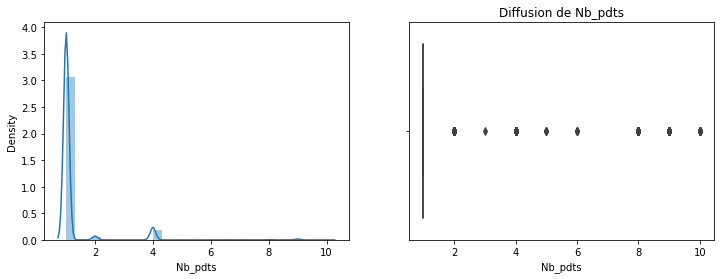

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


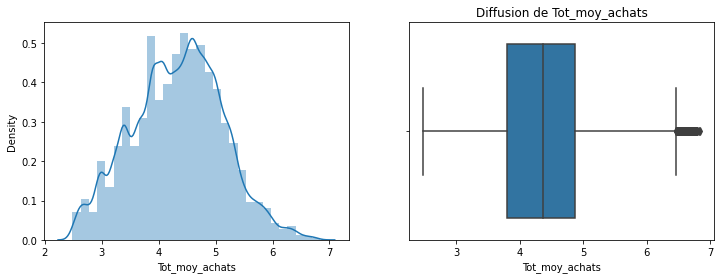

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


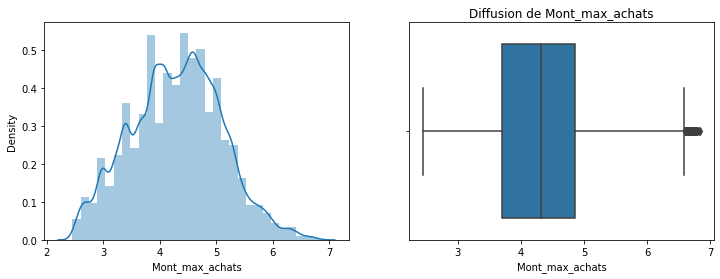

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


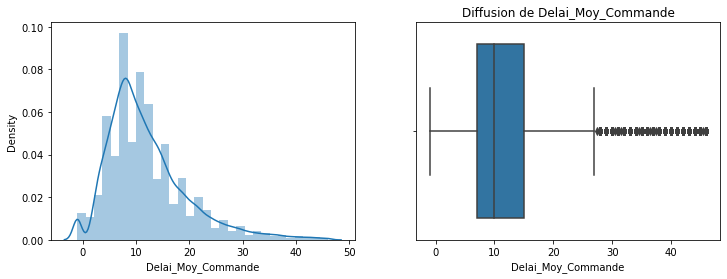

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


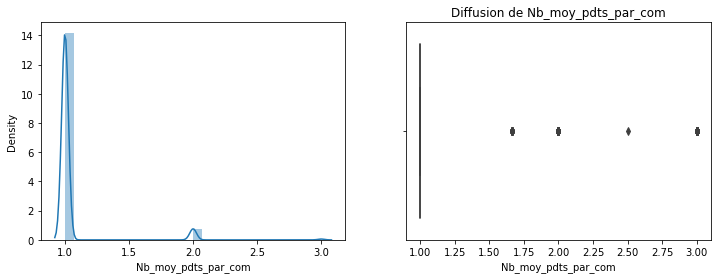

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


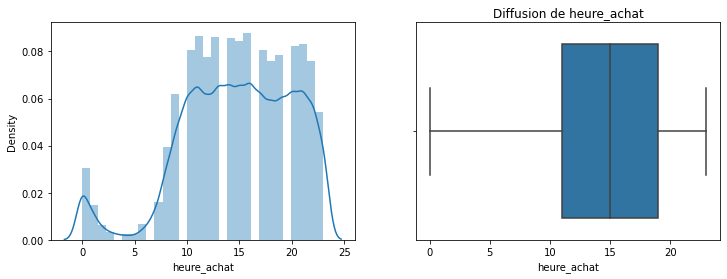

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


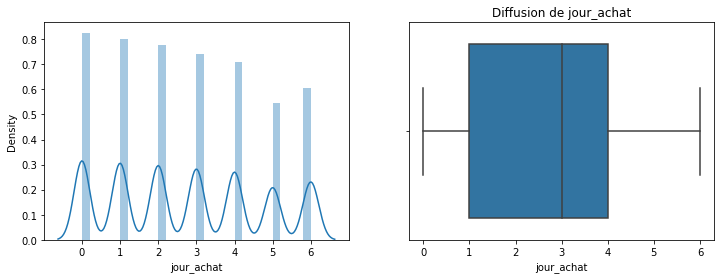

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


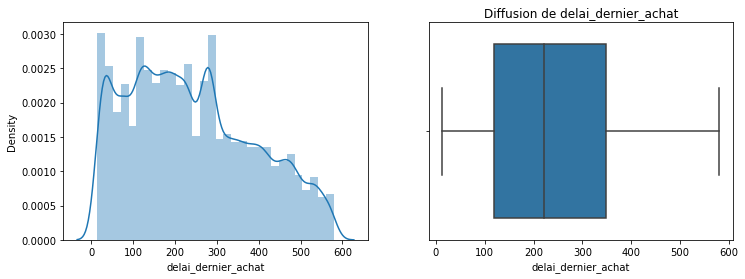

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


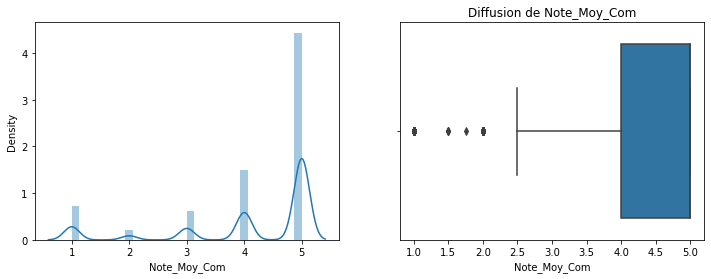

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


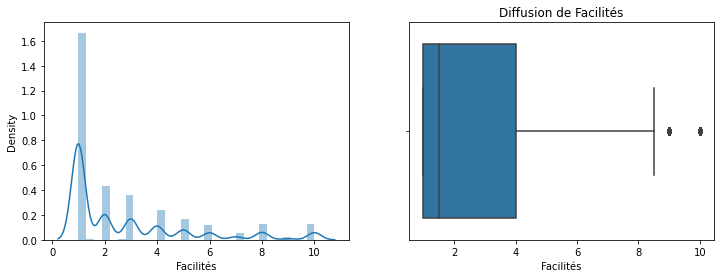

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


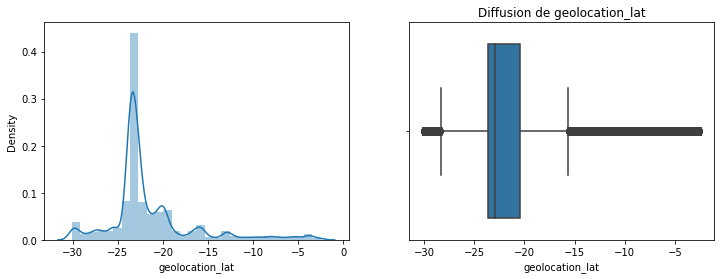

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


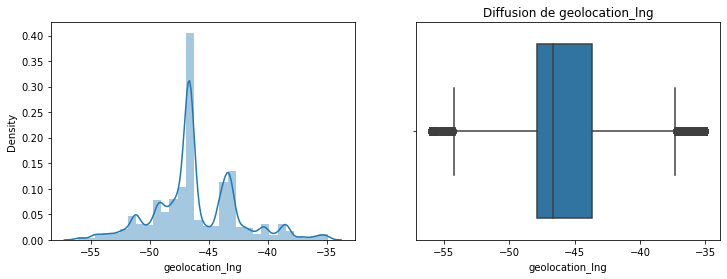

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


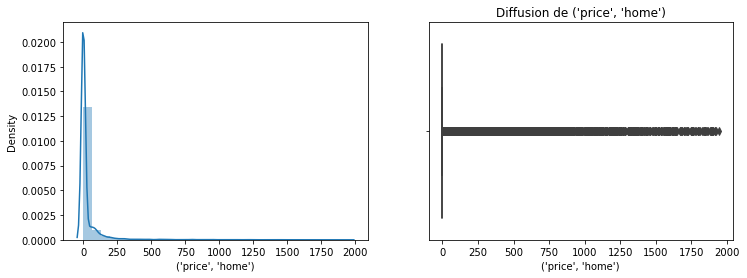

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


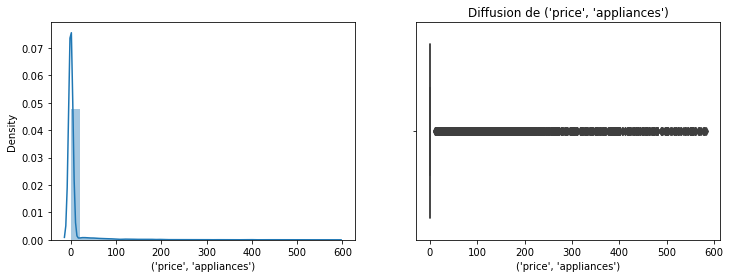

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


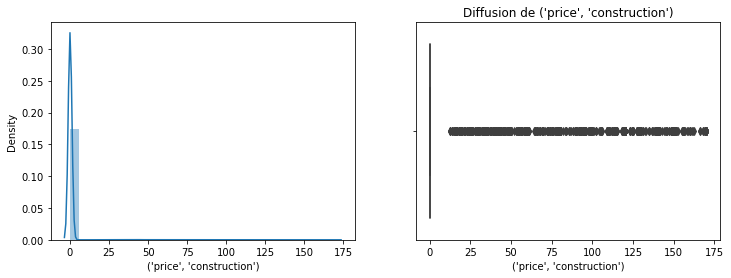

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


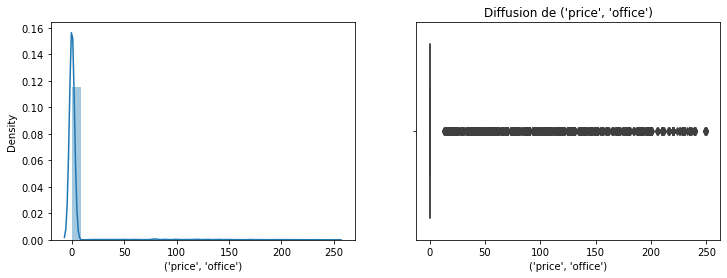

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


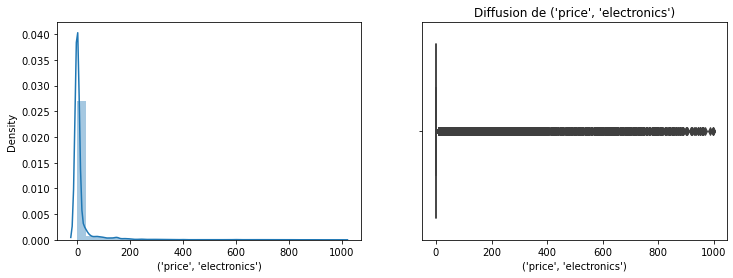

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


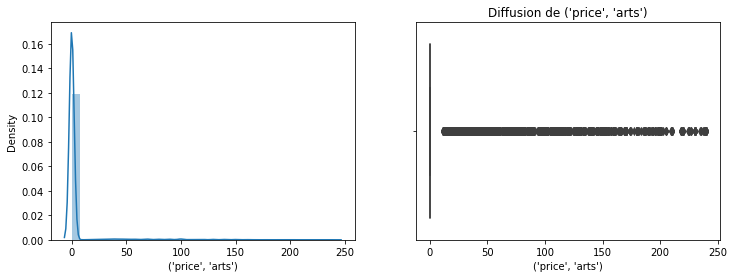

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


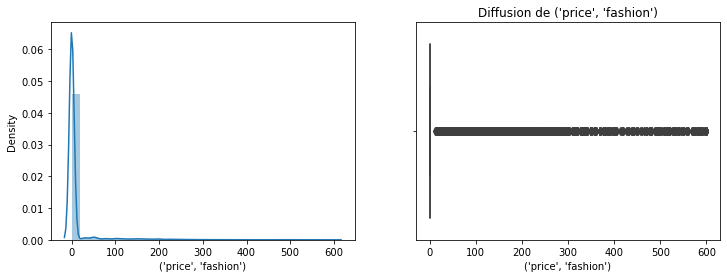

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


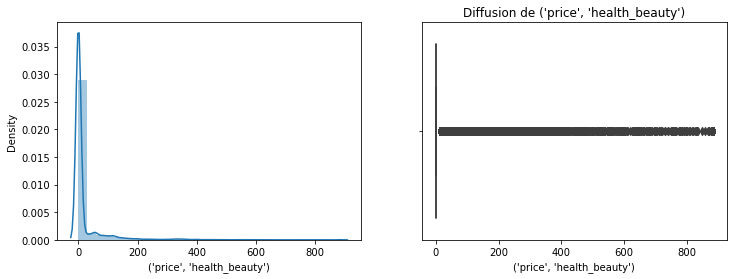

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


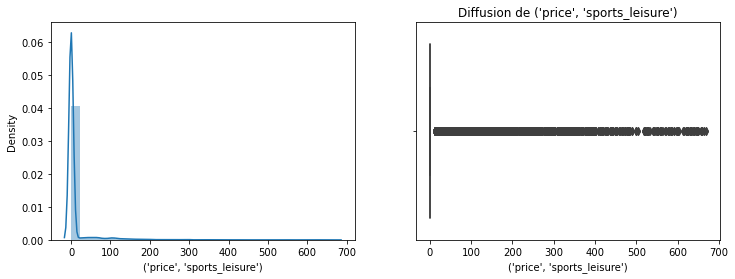

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


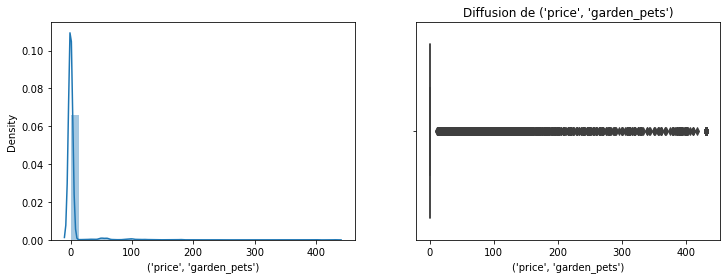

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


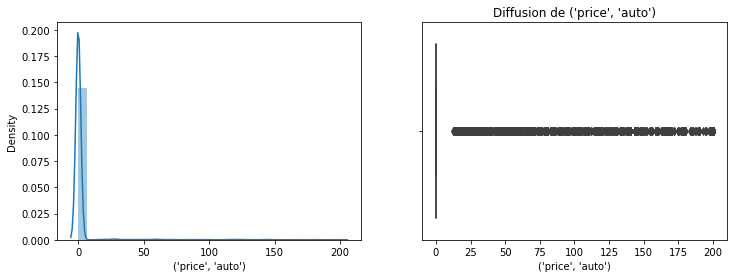

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


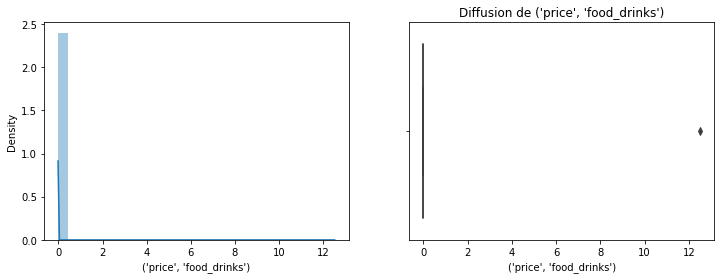

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


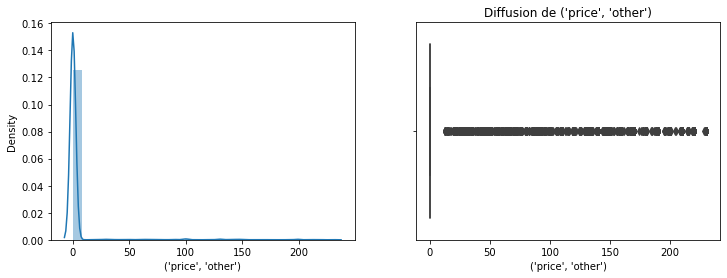

In [41]:
%matplotlib inline
i=10
for column in data_clients.select_dtypes(['int32', 'float64']).columns:
    f, axes = plt.subplots(1,2, figsize=(12,4))
    titre = 'Diffusion de ' + str(column)
    plt.title(titre)
    sns.distplot(data_clients[column], bins=30, ax=axes[0])
    titre = 'Diffusion de ' + str(column)
    plt.title(titre)
    plt.savefig('{}.png'.format(i),dpi=500)
    sns.boxplot(data_clients[column], ax=axes[1])
    i+=1
    plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


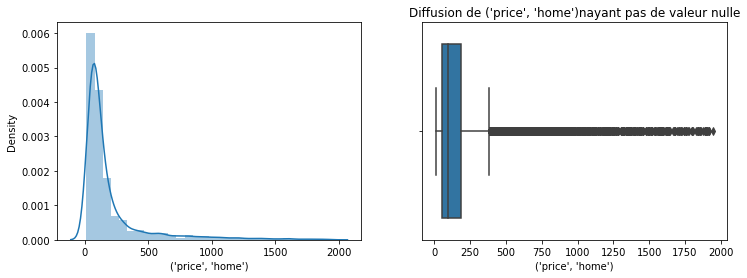

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


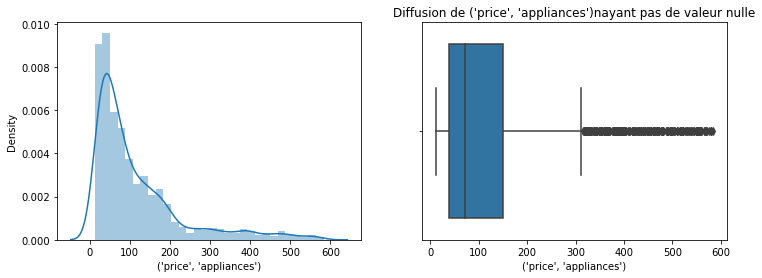

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


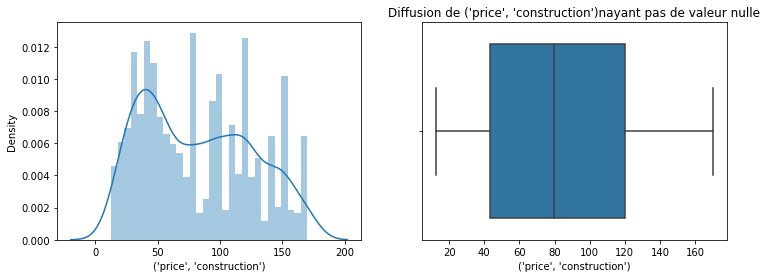

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


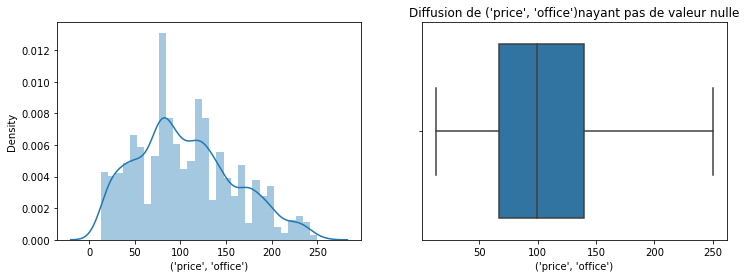

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


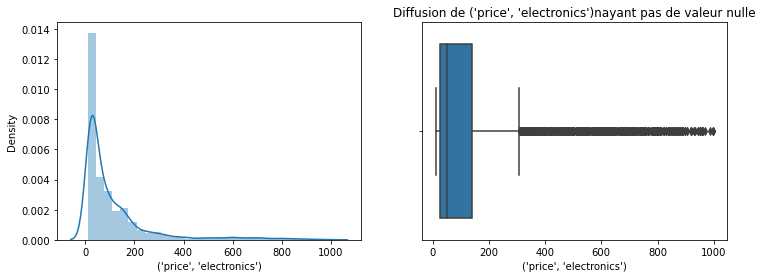

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


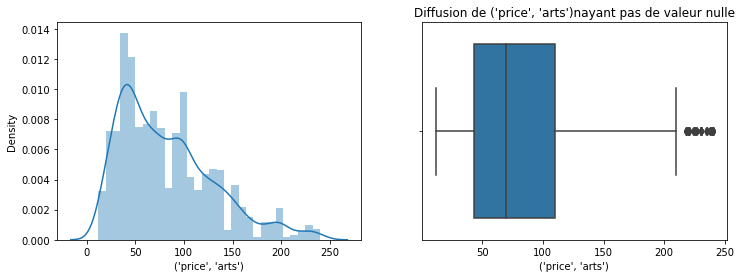

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


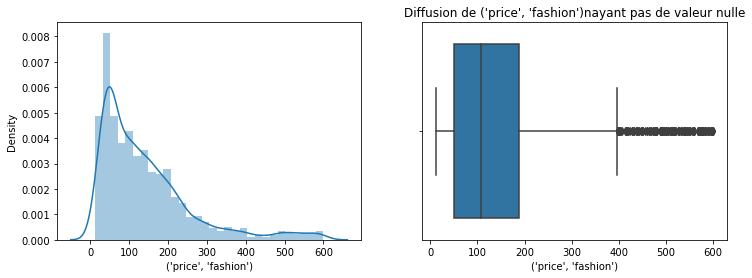

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


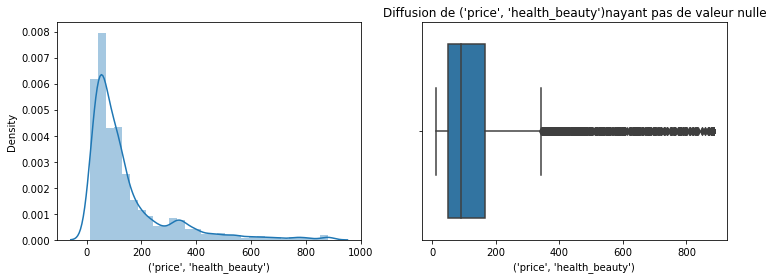

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


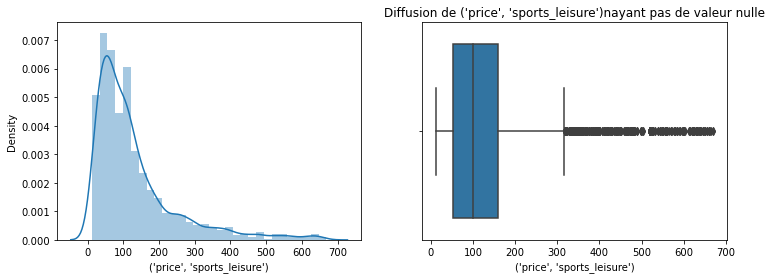

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


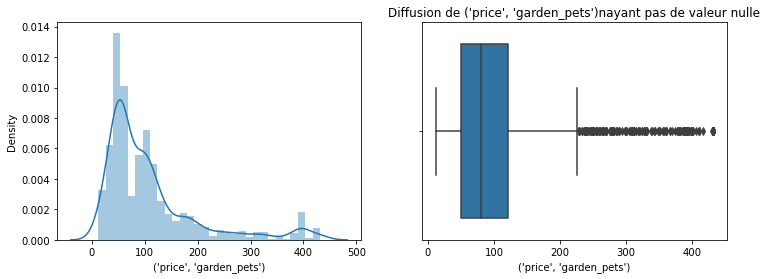

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


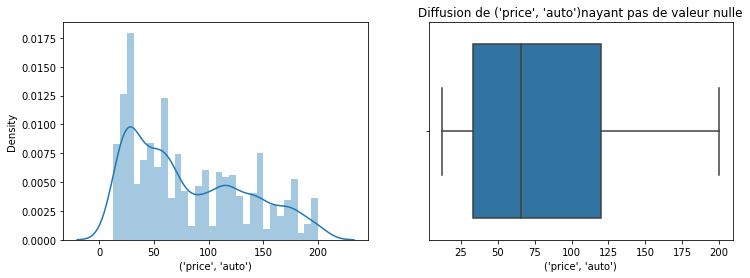

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


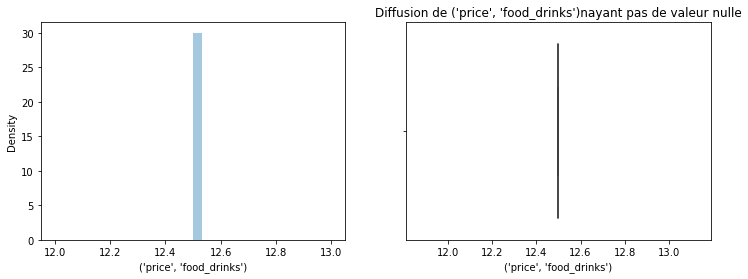

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


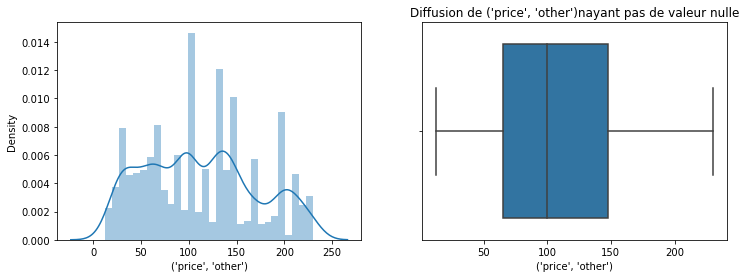

In [42]:
%matplotlib inline
i=101
for column in data_clients.select_dtypes(['int32', 'float64']).columns:
    if 'price' in column:
        f, axes = plt.subplots(1,2, figsize=(12,4))
        titre = 'Diffusion de ' + str(column) + 'nayant pas de valeur nulle'
        plt.title(titre)
        sns.distplot(data_clients[data_clients[column] != 0][column], bins=30, ax=axes[0])
        titre = 'Diffusion de ' + str(column) + 'nayant pas de valeur nulle'
        plt.title(titre)
        sns.boxplot(data_clients[data_clients[column] != 0][column], ax=axes[1])
        plt.savefig('{}.png'.format(i),dpi=500)
        i+=1
        plt.show()

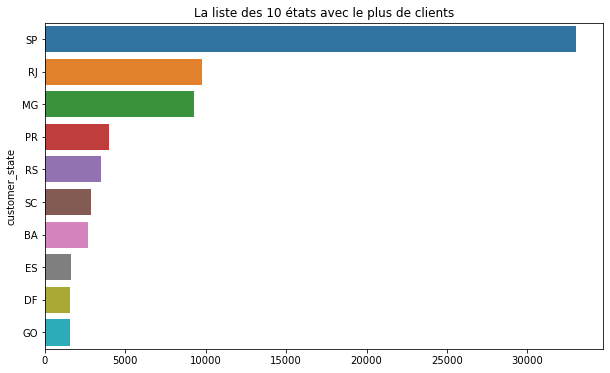

In [43]:
state = data_clients.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('La liste des 10 états avec le plus de clients')
plt.savefig('234.png',dpi=500)
sns.barplot(x = state.values,
           y = state.index)

In [44]:
data_clients

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,4.866765,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,2.939162,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,4.234107,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,5.192957,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,5.036953,2.0,1.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,154.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,fashion,95330,Other,RS,1.0,4.060443,4.060443,9.0,1.0,2017-12-17 19:14:35,19.0,6.0,259.0,5.0,boleto,1.0,-28.937008,-51.549726,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.00,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,44054,feira de santana,BA,1.0,4.172694,4.172694,31.0,1.0,2017-12-10 20:07:56,20.0,6.0,266.0,4.0,credit_card,1.0,-12.217900,-38.959237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,auto,78552,Other,MT,1.0,4.498698,4.498698,15.0,1.0,2017-02-07 15:49:16,15.0,1.0,572.0,5.0,credit_card,1.0,-11.834705,-55.508145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,89.9,0.0,0.0


In [45]:
data_clients['Cat_la_plus_achetee'].unique()

array(['home', 'health_beauty', 'office', 'electronics', 'garden_pets',
       'fashion', 'sports_leisure', 'appliances', 'auto', 'arts', 'other',
       'construction', 'food_drinks'], dtype=object)

In [46]:
products['product_weight_g'].mean()

2276.4724877841513

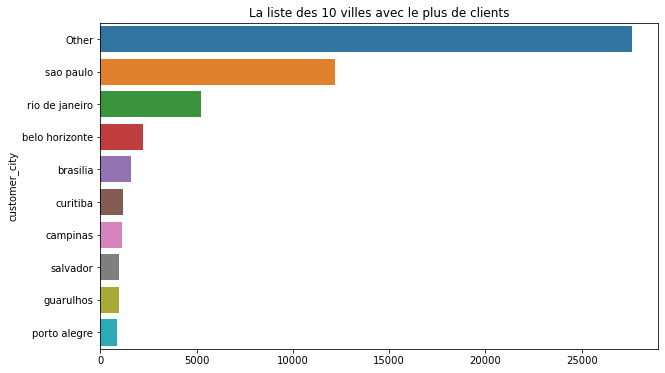

In [47]:
cities = data_clients.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('La liste des 10 villes avec le plus de clients')
plt.savefig('235.png',dpi=500)
sns.barplot(x = cities.values,
           y = cities.index)

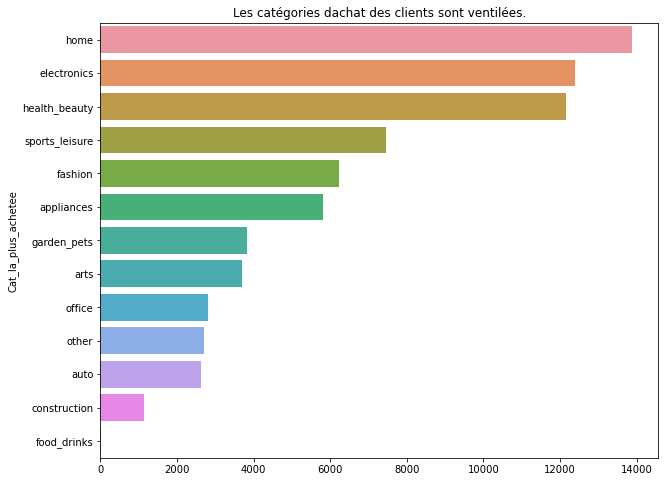

In [48]:
categories = data_clients.groupby(['Cat_la_plus_achetee']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Les catégories dachat des clients sont ventilées.')
plt.savefig('236.png',dpi=500)
sns.barplot(x = categories.values,
           y = categories.index)

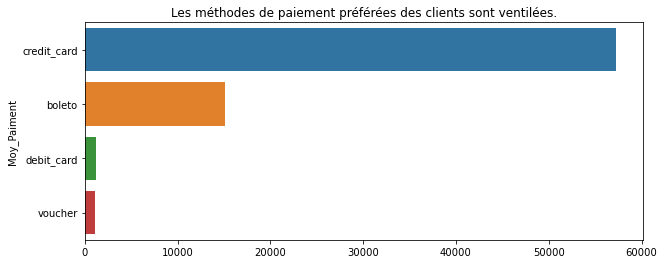

In [49]:
payment = data_clients.groupby(['Moy_Paiment']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Les méthodes de paiement préférées des clients sont ventilées.')
plt.savefig('237.png',dpi=500)
sns.barplot(x = payment.values,
           y = payment.index)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


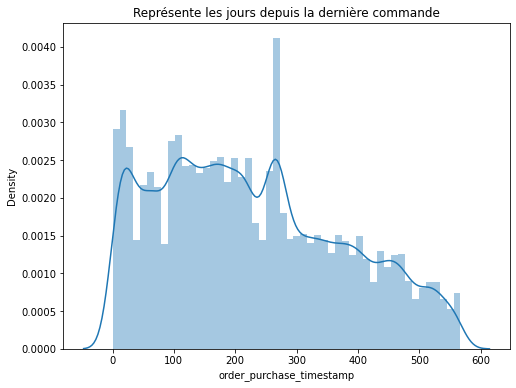

In [50]:
delai_achat = data_clients['order_purchase_timestamp'].max() - data_clients[
    'order_purchase_timestamp']
plt.figure(figsize=(8,6))
plt.title('Représente les jours depuis la dernière commande')
plt.savefig('238.png',dpi=500)
sns.distplot(delai_achat.dt.days, bins=50)
plt.show()

**Conclusions sur l'analyse des distributions des variables:**
* très peu de clients ont fait plus d'un achat;
* les distributions des montants d'achat par catégorie sont d'allure exponentielle
* la variable price food drinks n'apporte pas d'information

### Corrélations

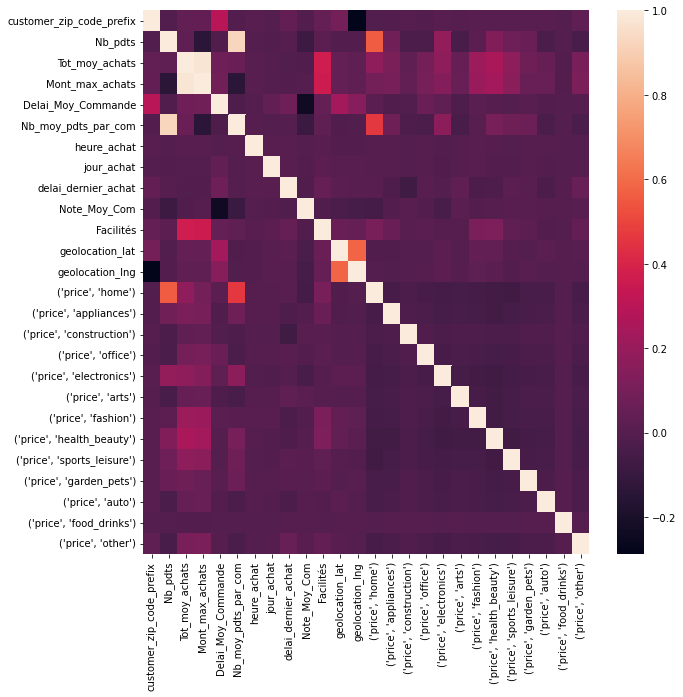

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(data_clients.corr())
plt.savefig('239.png',dpi=500)

On voit que certaines variables sont corrélées compte tenu du faible nombre de clients qui ont plusieurs transactions. C'est le cas de :
* nb de produits achetés avec nombre moyen de produits par commande
* montant total des achats avec montant moyen par commande

Egalement, la feature ('price', 'food_drinks') ne contient pas d'information

On va conserver une feature sur les 2 pour chaque corrélation

In [52]:
data_clients.drop(['Mont_max_achats','Nb_moy_pdts_par_com'], axis=1, inplace=True)

In [53]:
data_clients

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,26.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,14.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,2.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,154.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,fashion,95330,Other,RS,1.0,4.060443,9.0,2017-12-17 19:14:35,19.0,6.0,259.0,5.0,boleto,1.0,-28.937008,-51.549726,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.00,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,44054,feira de santana,BA,1.0,4.172694,31.0,2017-12-10 20:07:56,20.0,6.0,266.0,4.0,credit_card,1.0,-12.217900,-38.959237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,auto,78552,Other,MT,1.0,4.498698,15.0,2017-02-07 15:49:16,15.0,1.0,572.0,5.0,credit_card,1.0,-11.834705,-55.508145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,89.9,0.0,0.0


# Export jeu de données 

In [54]:
data_clients.select_dtypes(['object']).nunique()

Cat_la_plus_achetee    13
customer_city          98
customer_state         22
Moy_Paiment             4
dtype: int64

In [55]:
data_clients.to_csv('data/data_cleaned.csv')

In [56]:
data_clients.sample(10)

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fdc58370af81e72cd02ee17ff0e3164d,home,4191,sao paulo,SP,9.0,4.313480,3.0,2018-04-11 12:04:25,12.0,2.0,144.0,4.0,credit_card,1.0,-23.645816,-46.604085,672.3,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
f0b455e0ba8ae5c44f91438d043cb302,health_beauty,21351,rio de janeiro,RJ,1.0,4.077368,25.0,2018-02-25 15:10:10,15.0,6.0,189.0,1.0,credit_card,1.0,-22.869771,-43.344067,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,0.0,0.0,0.0,0.0,0.0
41e3c68264f86d0b5e3650e3ed2ff8d9,fashion,44780,Other,BA,1.0,3.552487,8.0,2017-09-10 16:33:49,16.0,6.0,357.0,5.0,credit_card,5.0,-10.572357,-40.275946,0.0,0.0,0.0,0.0,0.00,0.0,34.9,0.00,0.0,0.0,0.0,0.0,0.0
0a98c14ccb634eeba0094e7b84233af2,health_beauty,13460,Other,SP,1.0,5.220356,3.0,2017-08-23 18:46:17,18.0,2.0,375.0,4.0,credit_card,4.0,-22.785804,-47.294423,0.0,0.0,0.0,0.0,0.00,0.0,0.0,185.00,0.0,0.0,0.0,0.0,0.0
5fcec12eaf737cdb2ded91e81f1dc266,health_beauty,60321,fortaleza,CE,1.0,6.522093,23.0,2017-07-03 21:01:08,21.0,0.0,426.0,5.0,credit_card,7.0,-3.727519,-38.556737,0.0,0.0,0.0,0.0,0.00,0.0,0.0,680.00,0.0,0.0,0.0,0.0,0.0
35aaf89742d88485134770f27d419b60,electronics,8810,mogi das cruzes,SP,1.0,3.397858,8.0,2017-04-25 07:50:21,7.0,1.0,496.0,4.0,credit_card,4.0,-23.500037,-46.151809,0.0,0.0,0.0,0.0,29.90,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
632b6466e3d9ce93cd1067b1fcb6477d,home,17880,Other,SP,1.0,4.662495,12.0,2018-02-03 15:13:51,15.0,5.0,211.0,5.0,credit_card,5.0,-21.567825,-51.351517,105.9,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
ab37682da3bd1b975f7fcdc1a9c877f7,appliances,54515,Other,PE,1.0,5.393173,15.0,2018-02-21 11:49:05,11.0,2.0,193.0,4.0,credit_card,10.0,-8.283750,-35.024448,0.0,219.9,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
60fa2abe7171194126ecb847281cb81e,electronics,85010,Other,PR,1.0,3.331847,9.0,2018-01-08 08:53:52,8.0,0.0,238.0,5.0,credit_card,1.0,-25.391919,-51.467252,0.0,0.0,0.0,0.0,27.99,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [57]:
data_clients.describe()

,customer_zip_code_prefix,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
count,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000,74705.000000
mean,33386.670343,1.224858,4.331488,12.036031,14.806573,2.752346,240.296888,4.161986,2.703852,-21.567740,-46.091413,36.169453,8.984937,1.238121,3.954623,18.918821,4.094835,11.889678,23.483161,12.954103,5.550046,2.869090,0.000167,4.046919
std,29194.936932,0.889005,0.793698,7.631304,5.305916,1.971598,148.445407,1.275566,2.430049,4.870479,3.598355,141.492195,44.048312,11.368603,22.591399,75.916201,20.960529,52.360117,81.250926,53.579871,31.417867,17.990277,0.045734,23.657621
min,1003.000000,1.000000,2.484907,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.080304,-56.086513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9862.000000,1.000000,3.804438,7.000000,11.000000,1.000000,119.000000,4.000000,1.000000,-23.590533,-47.915131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22790.000000,1.000000,4.369448,10.000000,15.000000,3.000000,222.000000,5.000000,1.500000,-22.937637,-46.623089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47850.000000,1.000000,4.867534,15.000000,19.000000,4.000000,349.000000,5.000000,4.000000,-20.428729,-43.692112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99980.000000,10.000000,6.840547,46.000000,23.000000,6.000000,580.000000,5.000000,10.000000,-2.516840,-34.932184,1944.000000,583.200000,169.990000,249.900000,996.300000,239.920000,599.800000,882.560000,669.000000,431.200000,199.990000,12.500000,229.990000


In [52]:
data_clients.info

<bound method DataFrame.info of                                  Cat_la_plus_achetee  \
customer_unique_id                                     
0000366f3b9a7992bf8c76cfdf3221e2                home   
0000b849f77a49e4a4ce2b2a4ca5be3f       health_beauty   
0000f46a3911fa3c0805444483337064              office   
0004aac84e0df4da2b147fca70cf8255         electronics   
0004bd2a26a76fe21f786e4fbd80607f         garden_pets   
...                                              ...   
fffb09418989a0dbff854a28163e47c6             fashion   
fffea47cd6d3cc0a88bd621562a9d061       health_beauty   
ffff371b4d645b6ecea244b27531430a                auto   
ffff5962728ec6157033ef9805bacc48             fashion   
ffffd2657e2aad2907e67c3e9daecbeb       health_beauty   

                                  customer_zip_code_prefix     customer_city  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                      7787             Other   